In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('mnist_train.csv')
print(df.shape)

(60000, 785)


In [78]:
df.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [6]:
data = df.values

In [7]:
X = data[:,1:]
Y = data[:,0]
print(X.shape)
print(Y.shape)

(60000, 784)
(60000,)


In [8]:
from sklearn.cross_validation import train_test_split

C:\Users\Abhishek Garg\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


#### Can we use KNN?
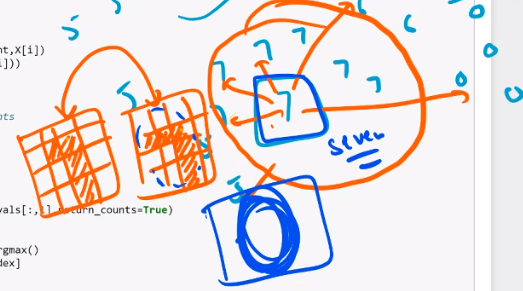

In [10]:
def dist(a,b):
    return np.sqrt(sum((a-b)**2))

def knn(X,Y,queryPoint,k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(X[i],queryPoint)
        vals.append([d,Y[i]])
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    counts = np.unique(vals[:,1],return_counts=True)
    max_freq_index = counts[1].argmax()
    prediction = counts[0][max_freq_index]
    return prediction

In [174]:
for i in range(Y_train.shape[0]):
    if Y_train[i]==5:
        print(i)

3
6
13
39
65
98
99
100
108
115
116
124
140
150
161
163
169
182
192
203
207
210
214
241
242
251
255
259
266
283
304
313
346
358
359
371
399
432
439
449
458
482
492
499
513
521
524
531
544
563
573
577
580
587
588
600
601
634
645
677
682
684
689
691
693
709
726
728
731
733
735
746
800
811
844
855
858
860
861
865
878
879
923
924
955
965
966
988
1009
1010
1015
1021
1028
1045
1048
1055
1064
1069
1071
1080
1095
1097
1101
1118
1125
1138
1147
1156
1162
1172
1207
1212
1216
1242
1267
1279
1296
1299
1302
1307
1308
1337
1344
1345
1350
1358
1379
1383
1404
1414
1424
1429
1436
1441
1455
1473
1483
1489
1492
1520
1541
1582
1588
1595
1600
1608
1621
1632
1633
1634
1644
1645
1652
1657
1680
1685
1699
1701
1712
1714
1754
1772
1788
1794
1811
1833
1834
1836
1845
1849
1852
1863
1864
1872
1881
1900
1901
1915
1929
1942
1950
1954
1975
1981
1999
2011
2021
2026
2034
2037
2046
2049
2059
2070
2079
2085
2094
2101
2140
2141
2155
2164
2179
2202
2208
2214
2225
2244
2248
2249
2263
2265
2285
2288
2290
2293
2301
2321
2331
23

22595
22640
22652
22710
22721
22726
22729
22740
22747
22773
22787
22795
22804
22807
22820
22832
22842
22863
22864
22894
22905
22914
22915
22916
22950
22958
22962
22975
22982
22993
23017
23030
23035
23046
23071
23076
23079
23082
23090
23104
23105
23136
23154
23159
23184
23186
23187
23196
23207
23217
23224
23225
23232
23267
23272
23281
23285
23298
23299
23300
23316
23330
23355
23384
23385
23398
23400
23411
23413
23434
23435
23437
23447
23463
23471
23472
23473
23480
23481
23496
23526
23535
23536
23539
23548
23559
23560
23588
23590
23594
23607
23627
23658
23665
23669
23700
23704
23705
23706
23710
23715
23725
23735
23744
23755
23757
23770
23783
23796
23808
23820
23851
23858
23867
23869
23905
23909
23924
23928
23940
23949
23952
23970
23972
23974
23980
23982
23986
23993
24021
24043
24058
24061
24076
24085
24093
24101
24156
24163
24177
24184
24198
24201
24211
24215
24217
24223
24236
24237
24244
24280
24311
24314
24318
24322
24326
24334
24353
24366
24379
24396
24410
24412
24414
24418
24426
2443

44787
44798
44811
44812
44814
44815
44816
44826
44831
44855
44866
44878
44884
44885
44906
44921
44923
44956
44966
44969
44977
44982
44989
44996
45016
45038
45040
45044
45060
45063
45074
45092
45101
45103
45117
45122
45141
45171
45182
45201
45210
45215
45223
45225
45243
45248
45264
45265
45271
45278
45311
45338
45349
45375
45392
45394
45408
45411
45418
45423
45455
45477
45487
45507
45520
45547
45555
45560
45575
45576
45596
45597
45614
45633
45643
45661
45663
45683
45694
45712
45722
45749
45754
45761
45791
45803
45809
45810
45813
45852
45866
45870
45898
45903
45918
45930
45944
45963
45979
45988
45991
46020
46027
46041
46048
46061
46070
46085
46110
46116
46134
46142
46166
46174
46187
46202
46204
46212
46216
46219
46220
46221
46232
46233
46247
46249
46251
46265
46282
46287
46289
46312
46313
46325
46340
46353
46356
46359
46364
46365
46366
46371
46376
46382
46392
46420
46423
46438
46445
46450
46453
46466
46474
46476
46504
46514
46524
46541
46551
46555
46562
46563
46575
46579
46638
46640
4666

In [244]:
print(Y_train[3])
print(X_train[3])

5
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 112 245 156   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  32 237 252 252 200 129  85  78   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  52 252 252 252 252 253 252 251 232 232 233 

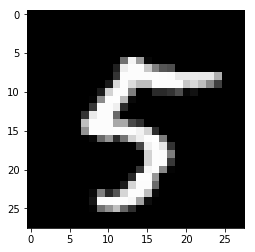

9


In [175]:
# Visualize some samples

def drawImg(sample):
    img =  sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(X_train[3])
print(Y_train[19])

In [159]:
pred = knn(X_train,Y_train,X_test[0])
print(int(pred))
print(Y_test[0])

8
8


In [160]:
X_test[0].shape

(784,)

In [ ]:
#Method to check accuracy.
correct = 0
m = X_test.shape[0]
for i in range(m):
    pred = knn(X_train,Y_train,X_test[i])
    if int(pred)==Y_test[i]:
        correct = correct+1
accuracy = (correct/X_test.shape[0])*100
print("accuracy is ",accuracy,"%")

## My try for recognizing handwritten images

In [176]:
import cv2

In [234]:
handwritten_img = cv2.imread('handwritten.jpg',cv2.IMREAD_GRAYSCALE)
crop_image = handwritten_img[105:520,350:650]
final_handwritten_image = cv2.resize(crop_image,(28,28))

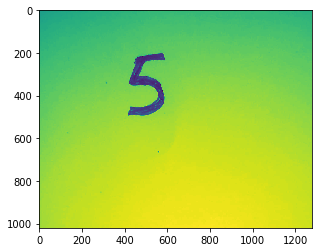

In [235]:
plt.imshow(handwritten_img)

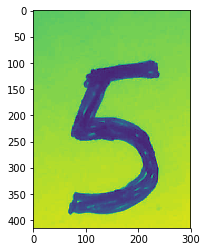

In [236]:
plt.imshow(crop_image)

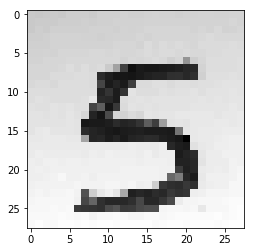

In [237]:
plt.imshow(final_handwritten_image,cmap='gray')

In [238]:
print(final_handwritten_image.shape)

(28, 28)


In [239]:
#final_handwritten_image

In [240]:
final_handwritten_image = final_handwritten_image.reshape(784,)
#final_handwritten_image_optimized = 125 - final_handwritten_image
print(final_handwritten_image.min())
print(final_handwritten_image.max())

46
164


In [246]:
for i in range(final_handwritten_image.shape[0]):
    if final_handwritten_image[i]>90:
        final_handwritten_image_optimized[i]=0
    else:
        final_handwritten_image_optimized[i]=(300-final_handwritten_image[i])

In [247]:
print(final_handwritten_image_optimized)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 224 247 242 243 243 242 241 239
 236 235   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 234
 240 244 243 244 242 239 237 237 232 231 235 232   

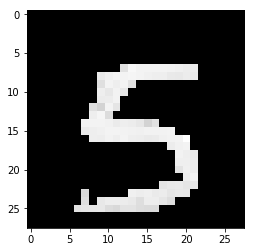

In [248]:
plt.imshow(final_handwritten_image_optimized.reshape(28,28),cmap='gray')

In [249]:
pred = knn(X_train,Y_train,final_handwritten_image_optimized)
print(int(pred))

5
